# Week 1 Checkpoint - Mini Project

## 1. Scenario
As a machine learning engineer, you are asked by a customer to create a machine learning model that can accurately predict the insurance charges based on certain attributes.

The customer has provided the relevant data for you to proceed with your project. The data is located in "insurance.csv" file. 

# About this dataset
The insurance.csv dataset contains information about individuals' age, gender, BMI, number of children, smoking status, and region of residence, as well as the associated insurance charges.This dataset contains detailed information about insurance customers, including their age, sex, body mass index (BMI), number of children, smoking status and region. Having access to such valuable insights allows analysts to get a better view into customer behaviour and the factors that contribute to their insurance charges. By understanding the patterns in this data set we can gain useful insight into how age,gender and lifestyle choices can affect a person's insurance premiums. This could be of great value when setting up an insurance plan or marketing campaigns that target certain demographics. Furthermore, this dataset provides us with an opportunity to explore deeper questions such as what are some possible solutions for increasing affordability when it comes to dealing with high charges for certain groups?

1. Age: The age of the customer. (Integer)
2. Children: The number of children the customer has. (Integer)
3. Smoker: Whether or not the customer is a smoker. (Boolean)
4. Region: The region the customer lives in. (String)
5. Charges: The insurance charges for the customer. (Float)

## 2. Task
Carry out the machine learning workflow to develop and test your machine learning model that can satisfy the customer's needs.

### 1. Problem formulation
Study the problem, and structure the problem in machine learning terms:
1. Is this problem a classification or regression problem?
2. Does the provided data align with the problem definition you have decided?

### 2. Data preparation
Inspect, explore and process the data so that it is ready to be used for your machine learning model development process. Carry out the data preparation steps that you deemed necessary.
1. Data loading
2. Exploratory data analysis
3. Data cleaning
4. Feature engineering
5. Data splitting - using K-Fold Cross Validation
6. Feature scaling

### 3. Model development
Develop a machine learning model that can satisfy the customer's needs. Use a suitable model for this dataset. In this process, you need to perform these steps:
1. Model selection
2. Model training
3. Model evaluation

There could be trial and error involved in this stage. Keep experimenting! Then select the best model that you have trained.

### 4. Model deployment
Saved your finalized model. This model will be used by your production team to develop a working app for the customer to use.

## 3. Submission
For this quiz, you are required to submit:
1. This notebook file that you have worked on, with the completed code.
2. The saved model you have exported.

You do not need to include the data file as part of your submission.

Place these two files in a folder, zip the folder, then submit the zip file. The name of the zip file should contain your own name for easier tracking (e.g. *kah_chun_week_1_quiz.zip*)


In [5]:
# 1. Import the necessary packages for your workflow.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

In [6]:
# 2. Load the given data.
data = pd.read_csv('datasets/insurance.csv')

In [7]:
# 3. Inspect and analyze the data (EDA).
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
dir(data)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

In [10]:
# 4. Perform the necessary data preprocessing steps (data cleaning, feature engineering, etc.)
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(1)

In [12]:
duplicates = data[data.duplicated()]
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [13]:
data = data.drop_duplicates() # Remove duplicates
data.duplicated().sum() # reinspect the duplicates

np.int64(0)

In [14]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [15]:
data.shape

(1337, 7)

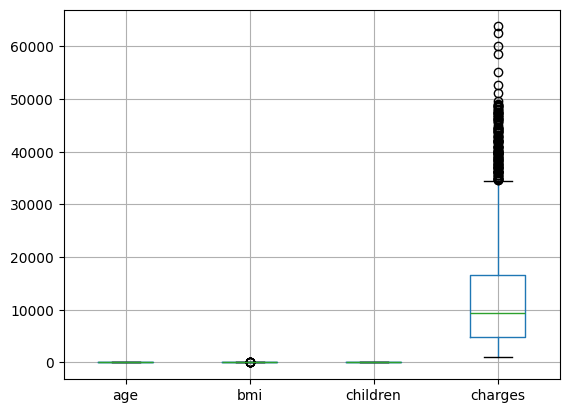

In [16]:
data.boxplot()
plt.show()

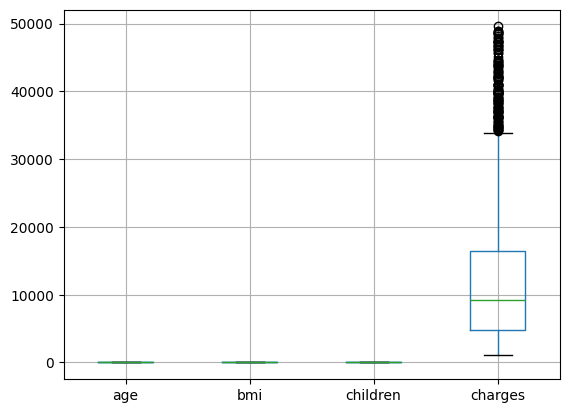

In [33]:

data_cleaned = data[(data['charges'] < 50000) & (data['bmi'] < 46)] # Remove outliers based on a specific threshold
data_cleaned.boxplot()
plt.show()

In [18]:
data_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


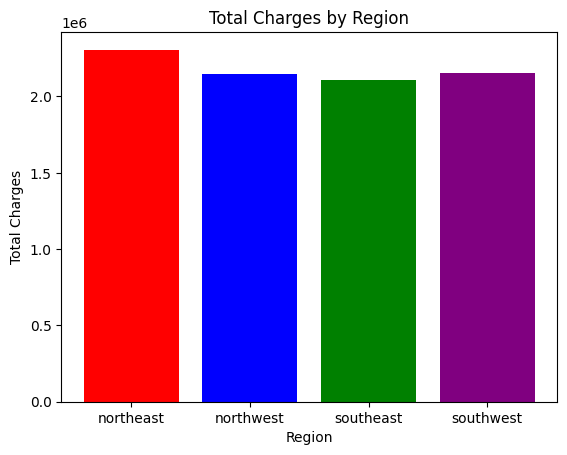

In [19]:
# Calculate the total charges by region
charges_by_region = data_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
colors = ['red', 'blue', 'green', 'purple']
plt.bar(charges_by_region.index, charges_by_region.values, color=colors)
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges by Region')
plt.show()

In [20]:
# Create age group
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[0, 25, 40, 60, data_cleaned['age'].max()], labels=['Adolescence', 'Young Adult', 'Adult', 'Senior'])
data_cleaned.sample(5)

,age,sex,bmi,children,smoker,region,charges,age_group
434,31,male,28.595,1,no,northwest,4243.59005,Young Adult
766,47,male,32.300,1,no,southwest,8062.76400,Adult
857,25,male,24.130,0,yes,northwest,15817.98570,Adolescence
1210,36,male,30.875,1,no,northwest,5373.36425,Young Adult
151,48,male,29.700,0,no,southeast,7789.63500,Adult


In [21]:
# Encode region
data_encoded = pd.get_dummies(data_cleaned, columns=['region'], prefix='region', dtype=int)
data_encoded.head()

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,16884.9240,Adolescence,0,0,0,1
1,18,male,33.77,1,no,1725.5523,Adolescence,0,0,1,0
2,28,male,33.00,3,no,4449.4620,Young Adult,0,0,1,0
4,32,male,28.88,0,no,3866.8552,Young Adult,0,1,0,0
5,31,female,25.74,0,no,3756.6216,Young Adult,0,0,1,0


In [22]:
# encode smoker
label_encoder = LabelEncoder()
data_encoded['smoker_encoded'] = label_encoder.fit_transform(data_encoded['smoker'])
data_encoded.head()

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
0,19,female,27.90,0,yes,16884.9240,Adolescence,0,0,0,1,1
1,18,male,33.77,1,no,1725.5523,Adolescence,0,0,1,0,0
2,28,male,33.00,3,no,4449.4620,Young Adult,0,0,1,0,0
4,32,male,28.88,0,no,3866.8552,Young Adult,0,1,0,0,0
5,31,female,25.74,0,no,3756.6216,Young Adult,0,0,1,0,0


In [23]:
# encode sex
data_encoded['sex_encoded'] = label_encoder.fit_transform(data_encoded['sex'])
data_encoded.head()

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
0,19,female,27.90,0,yes,16884.9240,Adolescence,0,0,0,1,1,0
1,18,male,33.77,1,no,1725.5523,Adolescence,0,0,1,0,0,1
2,28,male,33.00,3,no,4449.4620,Young Adult,0,0,1,0,0,1
4,32,male,28.88,0,no,3866.8552,Young Adult,0,1,0,0,0,1
5,31,female,25.74,0,no,3756.6216,Young Adult,0,0,1,0,0,0


In [24]:
# Remove column smoker and sex
data_encoded = data_encoded[[x for x in data_encoded.columns if x not in ['smoker', 'sex']]]
data_encoded.head()

,age,bmi,children,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
0,19,27.90,0,16884.9240,Adolescence,0,0,0,1,1,0
1,18,33.77,1,1725.5523,Adolescence,0,0,1,0,0,1
2,28,33.00,3,4449.4620,Young Adult,0,0,1,0,0,1
4,32,28.88,0,3866.8552,Young Adult,0,1,0,0,0,1
5,31,25.74,0,3756.6216,Young Adult,0,0,1,0,0,0


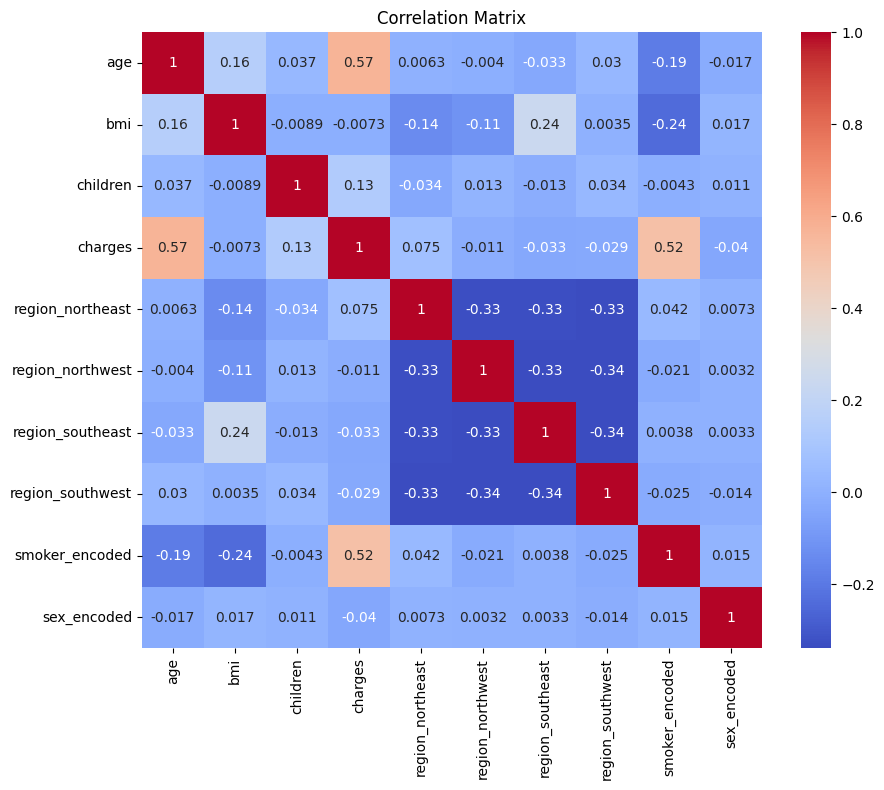

Relevant features based on correlation:
['age', 'smoker_encoded']


In [25]:
numr_cols = [x for x in data_encoded.columns if x not in ['age_group']]
corr_matrix = data_encoded[numr_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist() 
print("Relevant features based on correlation:") 
print(relevant_features)

In [26]:
# Select features
# X = data_encoded[['age', 'smoker_encoded']]
X = data_encoded[['age', 'bmi', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_encoded']]
# X = data_encoded['age', 'bmi', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_encoded']
y = data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# 5. Data splitting using K-Fold Cross Validation

from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold
kfcv = KFold(n_splits=5,shuffle=True,random_state=42)

# accuracy_list = []
dt_mse_list = []
dt_mae_list = []
dt_mape_list = []
dt_r2_list = []
rf_mse_list = []
rf_mae_list = []
rf_mape_list = []
rf_r2_list = []

for (k,(train,test)) in enumerate(kfcv.split(X, y)): # type: ignore
    # Feature scaling
    standard_scaler = StandardScaler()
    x_train_split = X.iloc[train] # type: ignore
    x_train_split = standard_scaler.fit_transform(x_train_split)
    x_test_split = standard_scaler.transform(X.iloc[test])
    # Model training
    model = LinearRegression()
    model.fit(x_train_split, y.iloc[train]) # type: ignore
    # Model evaluation
    print('Split number #',k+1)
    predictions = model.predict(x_test_split)
    # print('Confusion matrix:\n',confusion_matrix(y.iloc[test],predictions))
    # print('Classification report:\n',classification_report(y.iloc[test],predictions))
    # accuracy_list.append(accuracy_score(y.iloc[test],predictions))
    dt_mse = mean_squared_error(y.iloc[test], predictions)
    dt_mae = mean_absolute_error(y.iloc[test], predictions)
    dt_mape = mean_absolute_percentage_error(y.iloc[test], predictions)
    dt_r2 = r2_score(y.iloc[test], predictions)
    print("Decision Tree - MSE: ", dt_mse)
    print("Decision Tree - MAE: ", dt_mae)
    print("Decision Tree - MAPE: ", dt_mape)
    print("Decision Tree - R2: ", dt_r2)
    rf_mse = mean_squared_error(y.iloc[test], predictions)
    rf_mae = mean_absolute_error(y.iloc[test], predictions)
    rf_mape = mean_absolute_percentage_error(y.iloc[test], predictions)
    rf_r2 = r2_score(y.iloc[test], predictions)
    print("Random Forest - MSE: ", rf_mse)
    print("Random Forest - MAE: ", rf_mae)
    print("Random Forest - MAPE: ", rf_mape)
    print("Random Forest - R2: ", rf_r2)
    
    dt_mse_list.append(mean_squared_error(y.iloc[test], predictions))
    dt_mae_list.append(mean_absolute_error(y.iloc[test], predictions))
    dt_mape_list.append(mean_absolute_percentage_error(y.iloc[test], predictions))
    dt_r2_list.append(r2_score(y.iloc[test], predictions))
    rf_mse_list.append(mean_squared_error(y.iloc[test], predictions))
    rf_mae_list.append(mean_absolute_error(y.iloc[test], predictions))
    rf_mape_list.append(mean_absolute_percentage_error(y.iloc[test], predictions))
    rf_r2_list.append(r2_score(y.iloc[test], predictions))

    

Split number # 1
Decision Tree - MSE:  5722368.613229622
Decision Tree - MAE:  1213.5881122914484
Decision Tree - MAPE:  0.17347474107882202
Decision Tree - R2:  0.747109067493235
Random Forest - MSE:  5722368.613229622
Random Forest - MAE:  1213.5881122914484
Random Forest - MAPE:  0.17347474107882202
Random Forest - R2:  0.747109067493235
Split number # 2
Decision Tree - MSE:  7297328.051226701
Decision Tree - MAE:  1324.305266963103
Decision Tree - MAPE:  0.17941660487350977
Decision Tree - R2:  0.7147278832310007
Random Forest - MSE:  7297328.051226701
Random Forest - MAE:  1324.305266963103
Random Forest - MAPE:  0.17941660487350977
Random Forest - R2:  0.7147278832310007
Split number # 3
Decision Tree - MSE:  7783423.139009101
Decision Tree - MAE:  1274.8030544535038
Decision Tree - MAPE:  0.16729400718731072
Decision Tree - R2:  0.636277054671395
Random Forest - MSE:  7783423.139009101
Random Forest - MAE:  1274.8030544535038
Random Forest - MAPE:  0.16729400718731072
Random For

In [29]:
# 6. Feature scaling

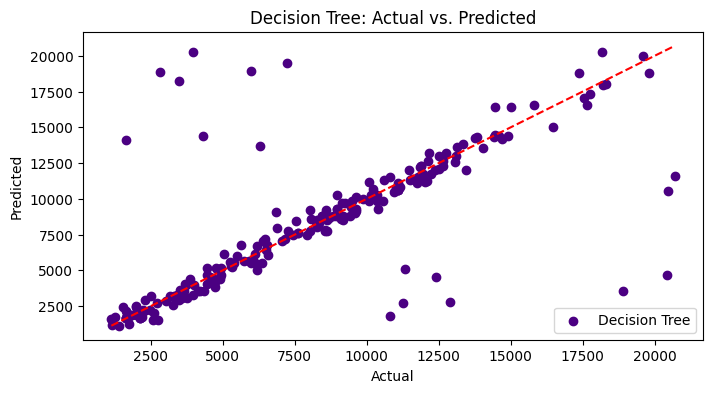

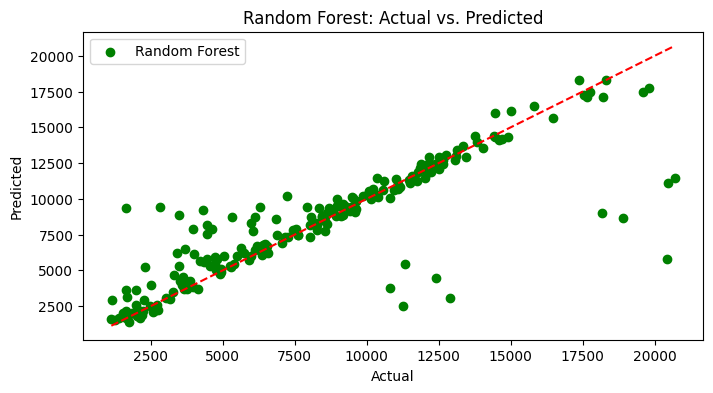

In [30]:
# 7. Model development
# Select features

X = data_encoded[['age', 'bmi', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'smoker_encoded']] # type: ignore
y = data_encoded['charges'] # type: ignore

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mape = mean_absolute_percentage_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='indigo', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [31]:
# 8. Model evaluation
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Decision Tree - MAPE: ", dt_mape)
print("Decision Tree - R2: ", dt_r2)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Random Forest - MAPE: ", rf_mape)
print("Random Forest - R2: ", rf_r2)

Decision Tree - MSE:  11531497.949838467
Decision Tree - MAE:  1325.64763364486
Decision Tree - MAPE:  0.23669787920783708
Decision Tree - R2:  0.4903838835211577
Random Forest - MSE:  5837227.648087042
Random Forest - MAE:  1136.3292029584843
Random Forest - MAPE:  0.2047456014536909
Random Forest - R2:  0.7420330560729349


In [34]:
# Conclusion

importance = dt_model.feature_importances_ 

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}") 

print()

# Random Forest
print("Random Forest:")

# Feature importances
importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns): 
    print(f"{feature}: {importance[i]}")




age: 0.5027214060777786
bmi: 0.14846009581445874
children: 0.03564981652807428
region_northeast: 0.01227197632134587
region_northwest: 0.005479513437763897
region_southeast: 0.005691183132684176
region_southwest: 0.011316552842956787
smoker_encoded: 0.27840945584493776

Random Forest:
age: 0.4967560040074297
bmi: 0.12381538290691449
children: 0.04841696848044486
region_northeast: 0.008520710699972013
region_northwest: 0.009374102411200187
region_southeast: 0.009070891520992387
region_southwest: 0.007994616855750742
smoker_encoded: 0.2960513231172956



**The conclusion of the “Regression Modelling using Insurance Dataset” includes:**

1. **Model Performance:** The regression model effectively predicts insurance costs based on various factors.
2. **Key Features:** Important features influencing insurance costs include age, BMI, and smoking status.
3. **Model Evaluation:** The model’s accuracy and performance metrics are satisfactory, indicating a good fit for the dataset.
4. **Future Improvements:** Suggestions for enhancing the model include exploring additional features and advanced algorithms.

In [38]:
import pickle as pkl

# Save model
with open('wan_ahmad_jailani_1_quiz.pkl', 'wb') as f:
    pkl.dump(model, f)